In [1]:
import pandas as pd

In [10]:
df = pd.read_csv("/data/Data/twitter-data/categorized_tweets.csv",encoding="ISO-8859-1")
df.head()
df = df[df["Category"] != "damaged_infrastructure"] #comment out if ypu want to use damaged infrastructure set.
df = df[df["Category"] != "shooting"]
df = df[df["Category"] != "crash"]

FileNotFoundError: [Errno 2] File b'/data/Data/twitter-data/categorized_tweets.csv' does not exist: b'/data/Data/twitter-data/categorized_tweets.csv'

In [7]:
col = ["Category", "Tweet"]
df = df[col]
df.columns = ['Category', 'Tweet']
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
df.head()

,Category,Tweet,category_id
0,fire,Firefighters battle a two-alarm blaze at 54 Ma...,0
1,fire,Pray for Fort McMurray \n#forrestfire #cl415 #...,0
2,fire,Addison and McGraw. E42X stretched. #fourthofj...,0
3,fire,With fire season starting my brother is a hots...,0
4,fire,These Forrest fires are OUT OF CONTROL! ðð...,0


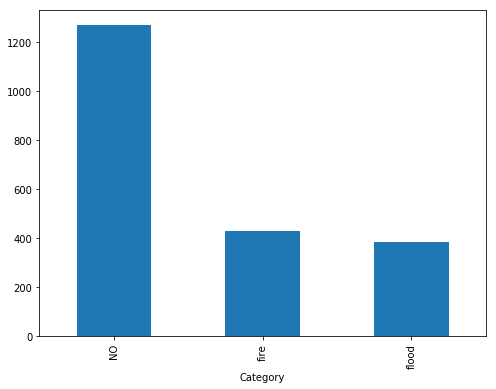

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Category').Tweet.count().plot.bar(ylim=0)
plt.show()

Pretty even split of data. If using damaged infrastructure set, there's a huge class imbalance. 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Tweet).toarray()
labels = df.category_id
features.shape

(2080, 1190)

In [6]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Category))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'NO':
  . Most correlated unigrams:
. forrestfire
. floodwater
  . Most correlated bigrams:
. spring break
. flood floodwater
# 'fire':
  . Most correlated unigrams:
. buildingfire
. forrestfire
  . Most correlated bigrams:
. woodstock http
. dead woodstock
# 'flood':
  . Most correlated unigrams:
. accrafloods
. floodwater
  . Most correlated bigrams:
. hurricane sandy
. flood floodwater


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
print(X_train_counts)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
model = LinearSVC().fit(X_train_tfidf, y_train)

  (0, 4309)	1
  (0, 4258)	1
  (0, 6094)	1
  (0, 4843)	1
  (0, 1563)	1
  (0, 3011)	1
  (0, 1321)	1
  (0, 4842)	1
  (0, 2329)	1
  (0, 3033)	1
  (0, 831)	1
  (0, 1562)	1
  (0, 5788)	1
  (0, 1319)	1
  (0, 1821)	1
  (0, 7647)	1
  (0, 7014)	1
  (0, 946)	1
  (0, 2998)	1
  (0, 4844)	1
  (0, 2417)	1
  (0, 4110)	2
  (0, 7688)	1
  (0, 4942)	1
  (0, 4589)	1
  :	:
  (1558, 6165)	1
  (1558, 7223)	1
  (1558, 2746)	1
  (1558, 4860)	1
  (1558, 1456)	1
  (1558, 1431)	1
  (1558, 6904)	1
  (1558, 7367)	1
  (1558, 736)	1
  (1558, 5378)	2
  (1558, 1248)	1
  (1558, 4271)	1
  (1558, 4110)	1
  (1559, 5491)	1
  (1559, 6476)	1
  (1559, 5552)	1
  (1559, 1456)	1
  (1559, 598)	1
  (1559, 3355)	1
  (1559, 4817)	1
  (1559, 3389)	1
  (1559, 5378)	1
  (1559, 786)	1
  (1559, 8135)	1
  (1559, 4110)	1


Look into different model types, LinearSVC, MultinomialNB, Logistic Regression and compare their accuricies

In [8]:
#Type in a sentence where it says Text here to see what it classifies it to
print(model.predict(count_vect.transform(['This party is fire'])))

['fire']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

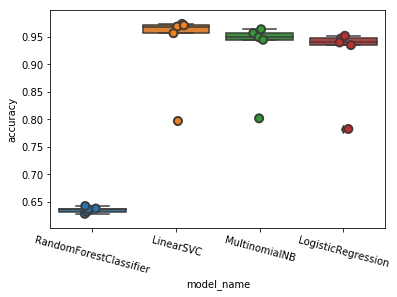

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
#plt.figure(figsize=(20,20))
plt.rcParams["figure.figsize"] = [6,6]
plt.xticks(rotation = -15)
plt.savefig('acc.png')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


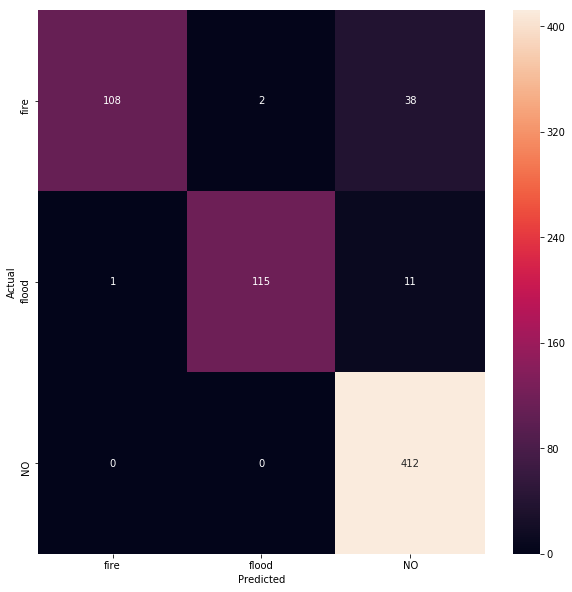

In [10]:
import seaborn as sns
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.savefig('confusion.png')
plt.show()

In [11]:
plt.savefig('confusion.png')

<Figure size 432x432 with 0 Axes>

In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Category'].unique()))

              precision    recall  f1-score   support

        fire       0.99      0.73      0.84       148
       flood       0.98      0.91      0.94       127
          NO       0.89      1.00      0.94       412

   micro avg       0.92      0.92      0.92       687
   macro avg       0.96      0.88      0.91       687
weighted avg       0.93      0.92      0.92       687

